# Can we improve DCA?
When it comes to investing, DCA is one of the most popular strategies. With DCA you can stop looking at the charts, put a fixed quantity in the market of your choice, and watch your money grow long term without caring about volatility. But can we improve DCA, while keeping its advantages?

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

from lib.data_load.csvs import get_btcusdt_data
from lib.strategies import DCA, DummyFNGDCA, DummyRollingFNGDCA, DummyCategoricFNGDCA, RelativeMean, RelativeCategoricalMean, MeanFNGDCA


START = "2020-01-01"
END = "2022-05-01"
WEEKLY_INVESTMENT = 100
PRICE_TODAY = 38_100

df = get_btcusdt_data(START, END)

df


,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount,dayofweek
date,,,,,,,,,,
2022-05-01,1.651363e+12,BTC/USDT,37630.80,38675.00,37386.38,38468.35,38812.241040,1.478259e+09,1021157.0,Sunday
2022-04-30,1.651277e+12,BTC/USDT,38596.11,38795.38,37578.20,37630.80,35321.189890,1.354901e+09,1017369.0,Saturday
2022-04-29,1.651190e+12,BTC/USDT,39742.06,39925.25,38175.00,38596.11,51453.657150,2.006136e+09,1101140.0,Friday
2022-04-28,1.651104e+12,BTC/USDT,39235.72,40372.63,38881.43,39742.07,56086.671500,2.223808e+09,1135242.0,Thurstday
2022-04-27,1.651018e+12,BTC/USDT,38112.64,39474.72,37881.31,39235.72,57083.122720,2.218524e+09,1232083.0,Wednesday
...,...,...,...,...,...,...,...,...,...,...
2020-01-05,1.578182e+12,BTC/USDT,7354.19,7495.00,7318.00,7358.75,38331.085604,2.848487e+08,329209.0,Sunday
2020-01-04,1.578096e+12,BTC/USDT,7345.00,7404.00,7272.21,7354.11,29987.974977,2.198742e+08,279370.0,Saturday
2020-01-03,1.578010e+12,BTC/USDT,6965.49,7405.00,6871.04,7344.96,68428.500451,4.950986e+08,519854.0,Friday


<AxesSubplot:xlabel='date'>

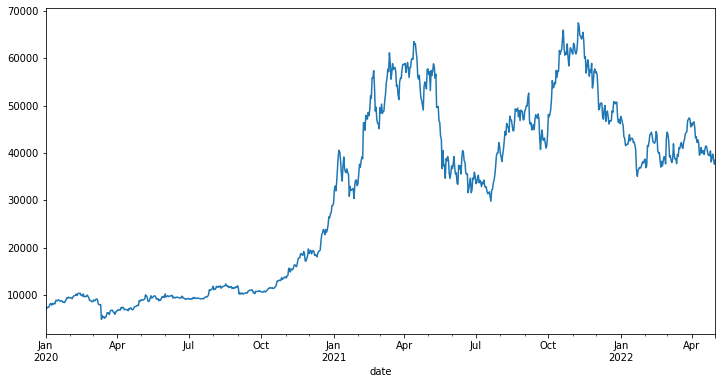

In [29]:
df.close.plot(figsize=(12, 6))

In [30]:

def test_strategy(column_name, price_today):
    
    results = []
    
    for day_of_week, df_dow in df.groupby("dayofweek"):
        
        df_dow = df_dow.assign(cripto_obtained=df_dow[column_name] / df_dow.close)
        
        results.append({
            "strategy": column_name,
            "dayofweek": day_of_week,
            "fiat_invested": df_dow[column_name].sum(),
            "btc_obtained": df_dow.cripto_obtained.sum(),
            "fiat_value": df_dow.cripto_obtained.sum() * price_today,        
        
    })
    
    df_results = pd.DataFrame(results)
    
    df_results = df_results.assign(gain_perc=df_results.fiat_value / df_results.fiat_invested)
    df_results = df_results.assign(avg_price=df_results.fiat_invested / df_results.btc_obtained)
    
    return df_results


In [31]:
df = df.assign(dca=DCA(WEEKLY_INVESTMENT).apply(df))
test_strategy("dca", PRICE_TODAY)

,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,dca,Friday,12200.0,0.684265,26070.492472,2.136926,17829.352495
1,dca,Monday,12100.0,0.677698,25820.307764,2.133910,17854.550930
2,dca,Saturday,12200.0,0.684509,26079.808868,2.137689,17822.983380
3,dca,Sunday,12200.0,0.687213,26182.832711,2.146134,17752.853754
4,dca,Thurstday,12200.0,0.686584,26158.841437,2.144167,17769.135576
5,dca,Tuesday,12100.0,0.673765,25670.460601,2.121526,17958.773984
6,dca,Wednesday,12200.0,0.682341,25997.174917,2.130916,17879.635056


In [32]:
df = df.assign(dummy_fng_dca=DummyFNGDCA(WEEKLY_INVESTMENT).apply(df))
test_strategy("dummy_fng_dca", PRICE_TODAY)


,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,dummy_fng_dca,Friday,12190.0,0.725877,27655.910923,2.268738,16793.480471
1,dummy_fng_dca,Monday,12004.0,0.734894,27999.476234,2.332512,16334.319834
2,dummy_fng_dca,Saturday,12090.0,0.723327,27558.770394,2.279468,16714.424969
3,dummy_fng_dca,Sunday,12138.0,0.743647,28332.945821,2.334235,16322.263238
4,dummy_fng_dca,Thurstday,11868.0,0.705610,26883.735086,2.265229,16819.493220
5,dummy_fng_dca,Tuesday,11850.0,0.719128,27398.757841,2.312131,16478.301776
6,dummy_fng_dca,Wednesday,11772.0,0.701738,26736.227191,2.271171,16775.485815


In [33]:
df = df.assign(dummy_categoric_fng_dca=DummyCategoricFNGDCA(WEEKLY_INVESTMENT).apply(df))
test_strategy("dummy_categoric_fng_dca", PRICE_TODAY)

,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,dummy_categoric_fng_dca,Friday,13150.0,0.799922,30477.018957,2.317644,16439.107798
1,dummy_categoric_fng_dca,Monday,12800.0,0.798915,30438.676793,2.378022,16021.721421
2,dummy_categoric_fng_dca,Saturday,12800.0,0.779434,29696.454172,2.320035,16422.162632
3,dummy_categoric_fng_dca,Sunday,12550.0,0.794972,30288.419900,2.413420,15786.726465
4,dummy_categoric_fng_dca,Thurstday,12500.0,0.766711,29211.687572,2.336935,16303.405917
5,dummy_categoric_fng_dca,Tuesday,12400.0,0.772739,29441.358855,2.374303,16046.813679
6,dummy_categoric_fng_dca,Wednesday,12400.0,0.763850,29102.701821,2.346992,16233.544325


In [34]:
df = df.assign(dummy_rolling_fng_dca=DummyRollingFNGDCA(WEEKLY_INVESTMENT, 30).apply(df))
test_strategy("dummy_rolling_fng_dca", PRICE_TODAY)

,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,dummy_rolling_fng_dca,Friday,12067.666667,0.696688,26543.827112,2.199582,17321.469812
1,dummy_rolling_fng_dca,Monday,11986.400000,0.701748,26736.603073,2.230578,17080.772705
2,dummy_rolling_fng_dca,Saturday,12079.800000,0.698517,26613.487076,2.203140,17293.501550
3,dummy_rolling_fng_dca,Sunday,12136.466667,0.714365,27217.300572,2.242605,16989.171236
4,dummy_rolling_fng_dca,Thurstday,12044.533333,0.698484,26612.258147,2.209489,17243.809881
5,dummy_rolling_fng_dca,Tuesday,11992.200000,0.695643,26504.013017,2.210104,17239.005267
6,dummy_rolling_fng_dca,Wednesday,12010.000000,0.690407,26304.492625,2.190216,17395.545564


In [35]:
df = df.assign(relative_mean=RelativeMean(WEEKLY_INVESTMENT).apply(df))
test_strategy("relative_mean", PRICE_TODAY)

,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,relative_mean,Friday,12989.734746,0.795310,30301.294663,2.332711,16332.928983
1,relative_mean,Monday,12860.765624,0.790606,30122.076797,2.342168,16266.978322
2,relative_mean,Saturday,12996.148491,0.800763,30509.061971,2.347546,16229.710962
3,relative_mean,Sunday,13291.826622,0.842919,32115.228572,2.416164,15768.799315
4,relative_mean,Thurstday,12913.309076,0.794994,30289.281845,2.345586,16243.273060
5,relative_mean,Tuesday,12747.250299,0.775697,29554.074690,2.318467,16433.274988
6,relative_mean,Wednesday,12602.586607,0.766443,29201.475728,2.317102,16442.954946


In [36]:
df = df.assign(relative_categorical_mean=RelativeCategoricalMean(WEEKLY_INVESTMENT).apply(df))
test_strategy("relative_categorical_mean", PRICE_TODAY)

,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,relative_categorical_mean,Friday,14300.0,0.868097,33074.495574,2.312902,16472.813585
1,relative_categorical_mean,Monday,14150.0,0.855583,32597.698287,2.303724,16538.437630
2,relative_categorical_mean,Saturday,14250.0,0.878460,33469.340657,2.348726,16221.562461
3,relative_categorical_mean,Sunday,14800.0,0.931559,35492.384278,2.398134,15887.351934
4,relative_categorical_mean,Thurstday,14400.0,0.877894,33447.748147,2.322760,16402.897964
5,relative_categorical_mean,Tuesday,14100.0,0.853534,32519.646481,2.306358,16519.552275
6,relative_categorical_mean,Wednesday,13850.0,0.834826,31806.876897,2.296525,16590.280200


In [37]:
df = df.assign(experiment=MeanFNGDCA(WEEKLY_INVESTMENT).apply(df))
test_strategy("experiment", PRICE_TODAY)

,strategy,dayofweek,fiat_invested,btc_obtained,fiat_value,gain_perc,avg_price
0,experiment,Friday,15350.0,0.997369,37999.745102,2.475553,15390.497974
1,experiment,Monday,14850.0,0.976800,37216.067315,2.506132,15202.707885
2,experiment,Saturday,14950.0,0.986983,37604.063606,2.515322,15147.166167
3,experiment,Sunday,15150.0,1.039317,39597.971466,2.613727,14576.883073
4,experiment,Thurstday,14800.0,0.972377,37047.559344,2.503213,15220.435839
5,experiment,Tuesday,14400.0,0.952508,36290.544734,2.520177,15117.987454
6,experiment,Wednesday,14150.0,0.930223,35441.508004,2.504700,15211.401274


In [38]:
df_results = pd.concat([
    test_strategy("dca", PRICE_TODAY),
    test_strategy("dummy_fng_dca", PRICE_TODAY),
    test_strategy("dummy_categoric_fng_dca", PRICE_TODAY),
    test_strategy("dummy_rolling_fng_dca", PRICE_TODAY),
    test_strategy("relative_mean", PRICE_TODAY),
    test_strategy("relative_categorical_mean", PRICE_TODAY),
    test_strategy("experiment", PRICE_TODAY)
]).reset_index(drop=True)

Text(0.5, 0.98, 'AVG Price by strategy')

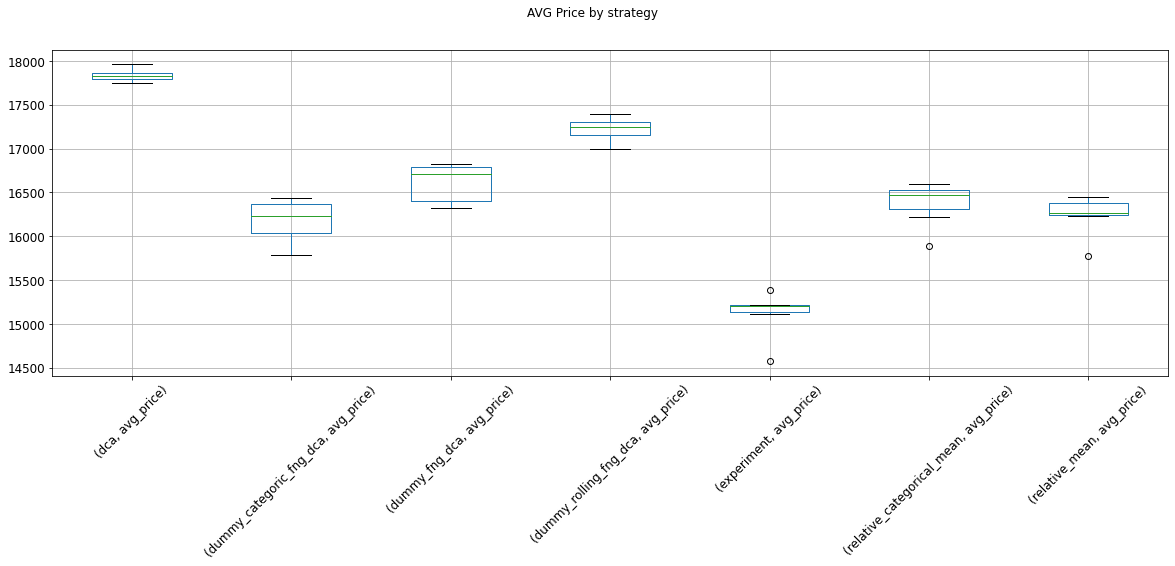

In [42]:

df_results[["strategy", "avg_price"]].groupby("strategy").boxplot(subplots=False, rot=45, fontsize=12, figsize=(20, 6))
plt.suptitle("AVG Price by strategy")

Text(0.5, 0.98, 'AVG Price by day of week')

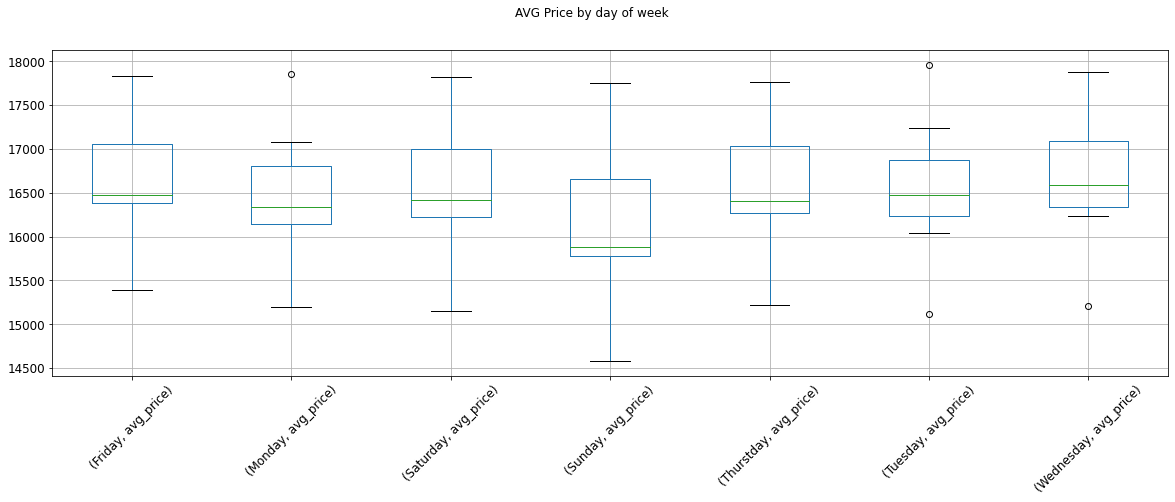

In [40]:
df_results[["dayofweek", "avg_price"]].groupby("dayofweek").boxplot(subplots=False, rot=45, fontsize=12, figsize=(20, 6))
plt.suptitle("AVG Price by day of week")